<a href="https://colab.research.google.com/github/Homaoa/From-scraping-to-data-analysis-Glassdoor-website/blob/main/Model_building%2C_evaluation%2C_tunning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
url='/content/glassdoor_data_cleaned.csv'
df=pd.read_csv(url)
df=df.drop(['Unnamed: 0'],axis=1)

In [ ]:
df.columns

In [4]:
df_model=df[['Avg_Salary','Rating','Title Simp','Hourly','Seniority','State']]

In [ ]:
df_dum=pd.get_dummies(df_model)
df_dum.head()

In [6]:
# train test split 
from sklearn.model_selection import train_test_split

x=df_dum.drop('Avg_Salary',axis=1)
y=df_dum['Avg_Salary']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
# multiple linear regression 

In [ ]:
import statsmodels.api as sm
x_sm = x = sm.add_constant(x)
model = sm.OLS(y,x_sm)
model.fit().summary()

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(x_train, y_train)

Rcross=cross_val_score(lm,x_train,y_train, cv= 4)
Rcross.mean()

In [ ]:
# lasso regression

In [ ]:
lm_l=Lasso(alpha=0.18)
lm_l.fit(x_train,y_train)
Rcross=cross_val_score(lm_l,x_train,y_train,cv=4)
Rcross.mean()

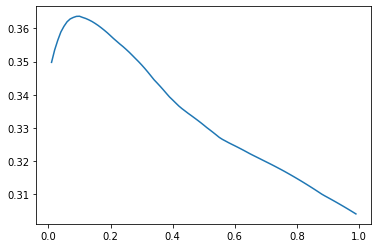

In [ ]:
alpha=[]
rcross=[]
for i in range(1,100):
  alpha.append(i/100)
  lml=Lasso(alpha=(i/100))
  rcross.append(np.mean(cross_val_score(lml,x_train,y_train,cv=4)))
plt.plot(alpha,rcross)

In [ ]:
#best alpha for this model is achived

In [ ]:
#polynomial model

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

input=[('scale',StandardScaler()),('polynomial',PolynomialFeatures(degree=3)),('model',LinearRegression())]

pipe=Pipeline(input)
pipe.fit(x_train,y_train)
Rcross=cross_val_score(pipe,x_train,y_train,cv=4)
Rcross.mean()

In [ ]:
degree=[]
rcross=[]
for i in range(1,10):
  degree.append(i)
  input=[('scale',StandardScaler()),('polynomial',PolynomialFeatures(degree=i)),('model',LinearRegression())]
  pipe1=Pipeline(input)
  rcross.append(np.mean(cross_val_score(pipe1,x_train,y_train,cv=4)))
plt.plot(degree,rcross)

In [ ]:
#the best degree for this polynomial model is obtained

In [ ]:
# random forest plus tunning

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

Rscore=cross_val_score(rf,x_train,y_train,cv= 4)
Rscore.mean()

In [15]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,cv=4)
gs.fit(x_train,y_train)

gs.best_score_
gs.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=220, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
#random forest has the best result

In [ ]:
# test ensembles 

In [20]:
tpred_lm = lm.predict(x_test)
tpred_lml = lm_l.predict(x_test)
tpred_pipe=pipe.predict(x_test)
tpred_rf = gs.best_estimator_.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score

print(r2_score(y_test,tpred_lm))
print(r2_score(y_test,tpred_lml))
print(r2_score(y_test,tpred_pipe))
print(r2_score(y_test,tpred_rf))
